<img src='../img/joint_school_banner_2.png' alt='joint school banner' align='right' width='100%'></img>

<br>

# GOZCARDS/MLS - Water Vapor - Level 3 - Time-series

This notebook lets you explore pre-processed H<sub>2</sub>O Level 3 data from the [Global Ozone Chemistry and Related trace gas Data records for the Stratosphere](https://acp.copernicus.org/articles/15/10471/2015/) (GOZCARDS) project as well as the [Aura Microwave Limb Sounder (MLS)](https://mls.jpl.nasa.gov/).

The pre-processed Level 3 data has been provided by [Luis Millan](https://science.jpl.nasa.gov/people/millan/) from the Jet Propulsion Laboratory (JPL). In July this year, he published the paper ['The Hunga Tonga-Hunga H'apai Hydration of the Stratosphere'](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022GL099381?campaign=woletoc). The paper shows that the H<sub>2</sub>O injection during the Hunga Tonga eruption was unprecedentend in both magnitude (far exceeding any previous values in the 17-year MLS record) and altitude (penetrating into the mesosphere). They conclude that the mass of H<sub>2</sub>O injected may take several years to dissipate. This could have an impact on the climate due to the radiative forcing from the excess stratospheric H<sub>2</sub>O.

This workflow reproduces the time-series of near-global (60 degrees South - 60 degrees North) H<sub>2</sub>O at 100 hPa and 31 hPa (Figure 5b in the published article).

### Basic Facts

The workflow makes use of the data file `timeseries.nc4` in the folder `../../eodata/training_school/mls_gozcards` and contains monthly averaged data (from 60S-60N) based on GOZCARDS and MLS L2 data. The pre-processed data are disseminated in the format `netCDF`.


### How to access the data

The pre-processed data is not publicly available, but can be requested from [Luis Millan](mailto:lmillan@jpl.nasa.gov). Level 2 Aura MLS and GOZCARDS data are available from the following data services:
* [GOZCARDS data via NASA EarthData GES DISC](https://disc.gsfc.nasa.gov/datasets?keywords=GOZCARDS)
* [Aura MLS Data Access](https://mls.jpl.nasa.gov/eos-aura-mls/data-access)

### Resources

* [Millan et al. (2022): The Hunga Tonga-Hunga H'apai Hydration of the Stratosphere](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022GL099381?campaign=woletoc)
* [Froidevaux  et al. (2015): Global OZone Chemistry and Related trace gas Data records for the Stratosphere (GOZCARDS): methodlogy and sample results with a focus on HCI, H<sub>2</sub>O and O<sub>3</sub>](https://acp.copernicus.org/articles/15/10471/2015/)

### Module outline
* [1 - Load the data file and select the water vapor time series information for two pressure levels](#load_mls_gozcards)
* [2 - Visualize the monthly averaged water vapor from 1995 to 2022 on two pressure levels](#visualize_mls_gozcards)

<hr>

#### Load required libraries

In [1]:
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

<hr>

## <a id="load_mls_gozcards"></a>Load the data file and select the water vapor time series information for two pressure levels

The first step is to load the netCDF file with the xarray function `open_dataset()`. The resulting xarray.Dataset has four data variables and two coordinates:
* Data variables:
   * `time_goz`: fractional year for the GOZCARDS averages
   * `val_goz`: monthly average data (from 60S-60N) based on GOZCARDS
   * `time_mls`: fractional year for the MLS averages
   * `val_mls`: monthly average data (from 60S-60N) based on MLS L2 data
* Coordinates:
   * `pre_goz`: Pressure levels for the GOZCARDS data
   * `pre_mls`: Pressure levels for the MLS data
   


In [2]:
timeseries = xr.open_dataset('../../eodata/training_school/mls_gozcards/timeseries.nc4')
timeseries

<xarray.Dataset>
Dimensions:   (tim_goz: 120, pre_goz: 31, tim_mls: 216, pre_mls: 55)
Coordinates:
  * pre_goz   (pre_goz) float32 1e+03 681.3 464.2 316.2 ... 0.02154 0.01468 0.01
  * pre_mls   (pre_mls) float32 1e+03 825.4 681.3 ... 4.642e-05 2.154e-05 1e-05
Dimensions without coordinates: tim_goz, tim_mls
Data variables:
    time_goz  (tim_goz) float32 ...
    val_goz   (pre_goz, tim_goz) float32 ...
    time_mls  (tim_mls) float32 ...
    val_mls   (pre_mls, tim_mls) float32 ...
Attributes:
    Format:                NetCDF
    ContactPersonName:     Luis Millan
    ContactPersonEmail:    lmillan@jpl.nasa.gov
    ContactPersonAddress:  4800 Oak Grove Dr M/S 183-701, Pasadena, CA 91109
    RelatedURL:            http://mls.jpl.nasa.gov/index-eos-mls.php

The data file stores the time information in two different variables, `time_goz` and `time_mls`. As you want to combine both datasets in order to build a time series from 1995 to 2022, you have to first create a variable that holds the time information combined. You first extract the two time variables and you rename the variable to `time`. With the xarray function `concat()`, you can combine the two xarray.DataArrays based on a given dimension.

In [3]:
time_goz = timeseries.time_goz.rename({'tim_goz':'time'})
time_goz

time_mls = timeseries.time_mls.rename({'tim_mls':'time'})
time_mls

time_combined = xr.concat([time_goz, time_mls], dim='time')
time_combined

<xarray.DataArray 'time_goz' (time: 336)>
array([1995.041 , 1995.126 , 1995.2026, 1995.2875, 1995.3696, 1995.4545,
       1995.5366, 1995.6215, 1995.7064, 1995.7885, 1995.8734, 1995.9556,
       1996.041 , 1996.126 , 1996.2053, 1996.2902, 1996.3723, 1996.4573,
       1996.5393, 1996.6243, 1996.7091, 1996.7913, 1996.8761, 1996.9583,
       1997.041 , 1997.126 , 1997.2026, 1997.2875, 1997.3696, 1997.4545,
       1997.5366, 1997.6215, 1997.7064, 1997.7885, 1997.8734, 1997.9556,
       1998.041 , 1998.126 , 1998.2026, 1998.2875, 1998.3696, 1998.4545,
       1998.5366, 1998.6215, 1998.7064, 1998.7885, 1998.8734, 1998.9556,
       1999.041 , 1999.126 , 1999.2026, 1999.2875, 1999.3696, 1999.4545,
       1999.5366, 1999.6215, 1999.7064, 1999.7885, 1999.8734, 1999.9556,
       2000.041 , 2000.126 , 2000.2053, 2000.2902, 2000.3723, 2000.4573,
       2000.5393, 2000.6243, 2000.7091, 2000.7913, 2000.8761, 2000.9583,
       2001.041 , 2001.126 , 2001.2026, 2001.2875, 2001.3696, 2001.4545,
       2001.5366, 2001.6215, 2001.7064, 2001.7885, 2001.8734, 2001.9556,
       2002.041 , 2002.126 , 2002.2026, 2002.2875, 2002.3696, 2002.4545,
       2002.5366, 2002.6215, 2002.7064, 2002.7885, 2002.8734, 2002.9556,
       2003.041 , 2003.126 , 2003.2026, 2003.2875, 2003.3696, 2003.4545,
       2003.5366, 2003.6215, 2003.7064, 2003.7885, 2003.8734, 2003.9556,
       2004.041 , 2004.126 , 2004.2053, 2004.2902, 2004.3723, 2004.4573,
       2004.5393, 2004.6243, 2004.7091, 2004.7913, 2004.8761, 2004.9583,
...
       2013.5366, 2013.6215, 2013.7064, 2013.7885, 2013.8734, 2013.9556,
       2014.041 , 2014.126 , 2014.2026, 2014.2875, 2014.3696, 2014.4545,
       2014.5366, 2014.6215, 2014.7064, 2014.7885, 2014.8734, 2014.9556,
       2015.041 , 2015.126 , 2015.2026, 2015.2875, 2015.3696, 2015.4545,
       2015.5366, 2015.6215, 2015.7064, 2015.7885, 2015.8734, 2015.9556,
       2016.041 , 2016.126 , 2016.2053, 2016.2902, 2016.3723, 2016.4573,
       2016.5393, 2016.6243, 2016.7091, 2016.7913, 2016.8761, 2016.9583,
       2017.041 , 2017.126 , 2017.2026, 2017.2875, 2017.3696, 2017.4545,
       2017.5366, 2017.6215, 2017.7064, 2017.7885, 2017.8734, 2017.9556,
       2018.041 , 2018.126 , 2018.2026, 2018.2875, 2018.3696, 2018.4545,
       2018.5366, 2018.6215, 2018.7064, 2018.7885, 2018.8734, 2018.9556,
       2019.041 , 2019.126 , 2019.2026, 2019.2875, 2019.3696, 2019.4545,
       2019.5366, 2019.6215, 2019.7064, 2019.7885, 2019.8734, 2019.9556,
       2020.041 , 2020.126 , 2020.2053, 2020.2902, 2020.3723, 2020.4573,
       2020.5393, 2020.6243, 2020.7091, 2020.7913, 2020.8761, 2020.9583,
       2021.041 , 2021.126 , 2021.2026, 2021.2875, 2021.3696, 2021.4545,
       2021.5366, 2021.6215, 2021.7064, 2021.7885, 2021.8734, 2021.9556,
       2022.041 , 2022.126 , 2022.2026, 2022.2875, 2022.3696, 2022.4545,
       2022.5366, 2022.6215, 2022.7064, 2022.7885, 2022.8734, 2022.9556],
      dtype=float32)
Dimensions without coordinates: time
Attributes:
    units:        fractional year
    description:  Fractional year

Let us extract the time series information from two different pressure levels: 100 hPa and 31 hPa. For each dataset (GOZCARDS and MLS), you can extract first the variable, e.g. val_goz and then select the pressure level with the function `sel()`. In order to plot the time-series information in one plot, you have to harmonized the naming of the time dimensions. For this, you can use the function `rename()`.

The result are four xarray.DataArrays with time-series information from two different pressure levels and the two datasets GOZCARDS and MLS.

In [4]:
# Define two pressure levels
prelev1 = 100.
prelev2 = 31.

# Create time series for values from GOZ at 100 hPa
val_goz_100 = timeseries.val_goz.sel(pre_goz=prelev1).rename({'tim_goz': 'time'})
val_goz_100

# Create time series for values from GOZ at 31 hPa (select nearest)
val_goz_31 = timeseries.val_goz.sel(pre_goz=prelev2, method='nearest').rename({'tim_goz': 'time'})
val_goz_31

# Create time series for values from MLS at 100 hPa
val_mls_100 = timeseries.val_mls.sel(pre_mls=prelev1).rename({'tim_mls': 'time'})
val_mls_100

# Create time series for values from MLS at 31 hPa (select nearest)
val_mls_31 = timeseries.val_mls.sel(pre_mls=prelev2, method='nearest').rename({'tim_mls': 'time'})
val_mls_31

<xarray.DataArray 'val_mls' (time: 216)>
array([4.407132, 4.386261, 4.430957, ...,      nan,      nan,      nan],
      dtype=float32)
Coordinates:
    pre_mls  float32 31.62
Dimensions without coordinates: time
Attributes:
    units:        ppmv
    long_name:    water vapor
    description:  Monthly average H2O based on MLS L2 data (60S-60N)

## <a id="visualize_mls_gozcards"></a>Visualize the monthly averaged water vapor from 1995 to 2022 on two pressure levels

In the last step, you can visualize the time-series of the monthly averaged water vapor and combine the information from GOZCARDS and MLS. The plot below visualizes the water vapor on 100 hPa from 1995 to 2022.

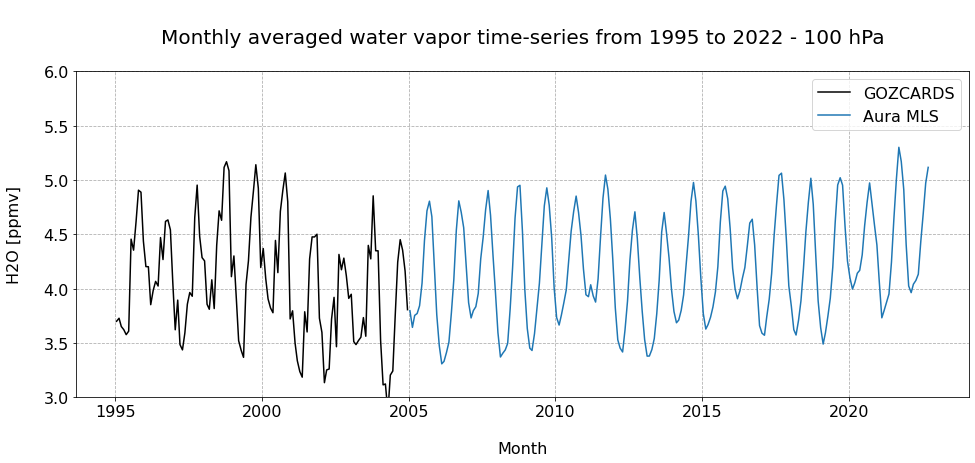

In [5]:
# Initiate the fig and axes object
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

# Plot the two time-series information
ax.plot(time_combined[:len(val_goz_100)], val_goz_100, color='black', label='GOZCARDS')
ax.plot(time_combined[len(val_goz_100):], val_mls_100, label='Aura MLS')

# Set plot title and axes lables
ax.set_title('\nMonthly averaged water vapor time-series from 1995 to 2022 - 100 hPa\n', fontsize=20)
ax.set_ylabel('H2O [ppmv]\n', fontsize=16)
ax.set_xlabel('\nMonth', fontsize=16)
ax.set_ylim(3,6)

# Adjust plot settings
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.grid(linestyle='--')
plt.legend(fontsize=16,loc=0)

Now, let us also visualize the monthly averaged water vapor information from 1995 to 2022 for the pressure level 31 hPa. You see clearly the unprecedented magnitude of water vapour due to the Hunga Tonga eruption.

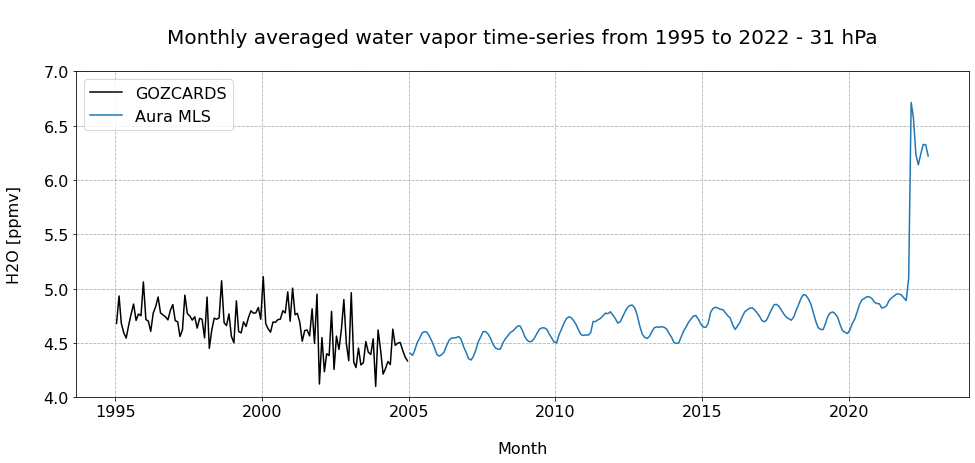

In [6]:
# Initiate the fig and axes object
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

# Plot the two time-series information
ax.plot(time_combined[:len(val_goz_31)], val_goz_31, color='black', label='GOZCARDS')
ax.plot(time_combined[len(val_goz_31):], val_mls_31, label='Aura MLS')

# Set plot title and axes lables
ax.set_title('\nMonthly averaged water vapor time-series from 1995 to 2022 - 31 hPa\n', fontsize=20)
ax.set_ylabel('H2O [ppmv]\n', fontsize=16)
ax.set_xlabel('\nMonth', fontsize=16)
ax.set_ylim(4,7)

# Adjust plot settings
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.grid(linestyle='--')
plt.legend(fontsize=16,loc=0)

<br>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a>.</p>